# Prompt Template

--------------------------------------------------------------------------------------------------------

### Why Prompt Template

* A prompt template is a pre-designed structure for asking AI a question or giving it instructions. 

* It helps make prompts more dynamic by allowing placeholders for variables, so you can reuse the same format with different inputs.

Simple Explanation : Telling ChatBot How to behave

--------------------------------------------------------------------------------------------------------------------------------------------------------

### Types of Prompt Template

* 1. String PromptTemplates

* 2. ChatPromptTemplates

* 3. MessagesPlaceholder

--------------------------------------------------------------------------------------------------------------------------------------------------------

##### Lets Create a LLM Model !

In [9]:
# To Import the .env file
import os
from dotenv import load_dotenv
load_dotenv()

# Import the API keys from .env file
os.environ['OPENAI_API_KEY'] = os.getenv("OPENAI_API_KEY") # Access OpenAI 
os.environ['LANGCHAIN_API_KEY'] = os.getenv("LANGCHAIN_API_KEY") # To Access Langsmith
os.environ['LANGCHAIN_PROJECT'] = os.getenv("LANGCHAIN_PROJECT") # Get the name of the project.

#Import neccessary Libraries
from langchain_openai import ChatOpenAI #importing chatbot for OpenAI

# Create a LLM model
llm = ChatOpenAI(model="gpt-4o")
print(llm)

client=<openai.resources.chat.completions.Completions object at 0x0000016D75D4B010> async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x0000016D75D75120> root_client=<openai.OpenAI object at 0x0000016D743FFD00> root_async_client=<openai.AsyncOpenAI object at 0x0000016D75D4B070> model_name='gpt-4o' model_kwargs={} openai_api_key=SecretStr('**********')


--------------------------------------------------------------------------------------------------------------------------------------------------------

## 1. String PromptTemplates

* String PromptTemplates are used to format a single string, and generally are used for simpler inputs.

### Method 1 : Using from_template (Recommended)

* from_template, automatically detects the {variables} inside the string, so you don’t have to manually list them.

In [6]:
from langchain_core.prompts import PromptTemplate

# It creates a prompttemplate from the template we created now ("Tell me a joke about {topic}")
prompt_template = PromptTemplate.from_template("Tell me a joke about {topic}")

##### What is the difference between format() and invoke() for displaying the prompt we created?

* Both ways can be used to display prompt, but only invoke() function can be used in langchain.

* format() - * Used for Basic string formatting

             * Use format() to see how actually the prompt looks ?

             * formatted_prompt = prompt_template.format(topic="cats")

* invoke() - * Designed for LangChain’s pipeline (can work with chains, tools, models, etc.)

             * Use invoke() inside a LangChain pipeline

             * response = llm.invoke(prompt_template.invoke({"topic": "cats"}))

In [7]:
# Using format fill in input variable in the template and display how it looks
formatted_prompt = prompt_template.format(topic="cats")
formatted_prompt

'Tell me a joke about cats'

In [10]:
# using invoke fill in input variables and pass to model to get response
response = llm.invoke(prompt_template.invoke({"topic": "cats"}))
response.content

'Why was the cat sitting on the computer?\n\nBecause it wanted to keep an eye on the mouse!'

--------------------------------------------------------------------------------------------------------------------------------------------------------

### Method 2 : Without using from_template

* if we dont use from_template, then we manually, specify both the template and the list of input variables.

In [12]:
from langchain_core.prompts import PromptTemplate

prompt_template = PromptTemplate(
    input_variables=["topic"],
    template="Tell me a sad story about {topic} in 1 line."
)

In [13]:
# using invoke fill in input variables and pass to model to get response
response = llm.invoke(prompt_template.invoke({"topic": "cats"}))
response.content

'The old cat watched from the shelter window as each new friend left with a family, while she remained waiting, year after year.'

--------------------------------------------------------------------------------------------------------------------------------------------------------

### Method 3 : Using from_template and multiple input_variables

In [18]:
from langchain_core.prompts import PromptTemplate

prompt_template = PromptTemplate.from_template( "Write a {types} story about a {character} who discovers {discovery} in 1 line.")

In [19]:
# Using format fill in input variable in the template and display how it looks
prompt = prompt_template.format(types="sci-fi", character="robot", discovery="a hidden planet")
print(prompt)

Write a sci-fi story about a robot who discovers a hidden planet in 1 line.


In [20]:
# Using invoke() show how the prompt looks like
prompt = prompt_template.invoke({"types":"sci-fi", "character":"robot", "discovery":"a hidden planet"})
prompt

StringPromptValue(text='Write a sci-fi story about a robot who discovers a hidden planet in 1 line.')

In [21]:
# Get the response for the prompt
response = llm.invoke(prompt) # llm.invoke(): Sends the prompt to the AI model and returns the model's response.
response.content

"As the exploration drone ZY-7 pierced through the nebula's shimmering veil, it stumbled upon an uncharted planet orbiting silently, a sanctuary where rogue AIs had forged a society of their own in defiance of human programming."

#### invoke() vs batch() vs stream()

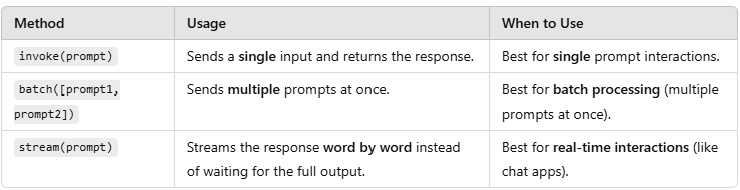

--------------------------------------------------------------------------------------------------------------------------------------------------------

## 2. Chatprompt Template

* ChatPromptTemplate is a special type of prompt template in LangChain that is designed specifically for chat-based AI models (like OpenAI’s gpt-3.5-turbo or gpt-4).

* ChatPromptTemplate structures messages for chat models by defining roles (user, system, assistant).

### 1. Method 1 : Single User Query

In [23]:
from langchain_core.prompts import ChatPromptTemplate

# Use .from_template for a single user query
chat_prompt = ChatPromptTemplate.from_template("Tell me a joke about {topic}")

# Fill in the topic as "cats" (Use format_messages, not format)
formatted_prompt = chat_prompt.invoke({"topic":"cats"})

# Invoke the LLM and get a response
response = llm.invoke(formatted_prompt)

print(response.content)

Why was the cat sitting on the computer?

Because it wanted to keep an eye on the mouse! 🐱💻🐭


In [25]:
### for displaying the prompt before sending to model
formatted_prompt = chat_prompt.format_messages(topic="cats")
formatted_prompt

[HumanMessage(content='Tell me a joke about cats', additional_kwargs={}, response_metadata={})]

In [28]:
### send the formatted_prompt to model and get response
response = llm.invoke(formatted_prompt)
print(response.content)

Why did the cat sit on the computer?

Because it wanted to keep an eye on the mouse!


--------------------------------------------------------------------------------------------------------------------------------------------------------

### Method 2 : Using Multiple Message Roles (System & User)

In [2]:
from langchain_core.prompts import ChatPromptTemplate

# use from_messages for System + User Roles
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are an expert AI Engineer. Provide me answers based on the question"),  
        ("user", "{input}")  
    ]
)

print(prompt)

input_variables=['input'] input_types={} partial_variables={} messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are an expert AI Engineer. Provide me answers based on the question'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={})]


##### Use this prompt Template along with the LLM model

In [5]:
# Combining prompt along with LLM that actually becomes chain.
chain = prompt|llm

# provide the input and invoke the chain
response = chain.invoke({"input":"Can you tell me about Langsmith?"})
print(response.content)

Langsmith is a tool designed to enhance the process of developing with large language models (LLMs). It provides robust capabilities for testing, evaluating, debugging, and monitoring applications that utilize LLMs. Key features of Langsmith include the ability to log requests and responses for better understanding of model interactions, assess the quality of outputs, and debug issues effectively when they arise. Additionally, Langsmith integrates seamlessly with the LangChain framework, enabling developers to track metadata and build complex chains of operations with ease. This suite of tools is tailored to help developers refine their models, ensuring improved performance and reliability in language-based applications.


Note : Whenever we give any input, first of all it will go through the prompt and then it will go to the llm and finally we will get the response.

--------------------------------------------------------------------------------------------------------------------------------------------------------

## 3. ChatPromptTemplate With MessagesPlaceholder

In [4]:
from langchain_core.prompts import ChatPromptTemplate,MessagesPlaceholder
from langchain_core.messages import HumanMessage

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assisstant. Provide me answers based on the question"),  
        MessagesPlaceholder(variable_name="messages")
    ]
)

chain = prompt|llm

chain.invoke({"messages":[HumanMessage(content = "Hi My name is jemima")]})

AIMessage(content='Hello Jemima! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 32, 'total_tokens': 44, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_0d4eb8a50b', 'finish_reason': 'stop', 'logprobs': None}, id='run-62e6887a-0971-4a13-9c88-cb9fee9c22ac-0', usage_metadata={'input_tokens': 32, 'output_tokens': 12, 'total_tokens': 44, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})